# COVID 19 TIME SERIES MODEL

## Problem Statement

- Task 1:- Prepare a complete data analysis report on the given data.

- Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

- Task3:- Make suggestions to the government health department of the country/region for preparation based on your predictions.




# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prs

# LOADING THE DATASET

In [ ]:
dfc = pd.read_csv('time_series_covid19_confirmed_global.csv')
dfd = pd.read_csv('time_series_covid19_deaths_global.csv')
dfr = pd.read_csv('time_series_covid19_recovered_global.csv')

# Making the timing dataframe by analyzing the dataset

In [ ]:
dfc.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [ ]:
dfd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [ ]:
dfr.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


# Taking the time from 1/22/20 to 9/21/20

- creating a dataframe named df_n that has 3 columns confirmed , death, recovered with time values from 1/22/20

In [ ]:
df_N=pd.DataFrame()
df_N['confirmed']=pd.DataFrame(dfc.loc[:,'1/22/20':].sum())
df_N['death']=pd.DataFrame(dfd.loc[:,'1/22/20':].sum())
df_N['recovered']=pd.DataFrame(dfr.loc[:,'1/22/20':].sum())


In [ ]:
df_N.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1/22/20 to 9/21/20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   confirmed  244 non-null    int64
 1   death      244 non-null    int64
 2   recovered  244 non-null    int64
dtypes: int64(3)
memory usage: 7.6+ KB


In [ ]:
df_N.head()

,confirmed,death,recovered
1/22/20,555,17,28
1/23/20,654,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52


In [ ]:
df_N.tail()

,confirmed,death,recovered
9/17/20,30175313,946061,20527185
9/18/20,30499534,951767,20778990
9/19/20,30780755,956999,21016801
9/20/20,31021972,960695,21252815
9/21/20,31245797,963693,21394593


# CONVERTING DATA IN df_N from int to datetime

In [ ]:
df_N.index=pd.to_datetime(df_N.index)

C:\Users\SCR91020288\AppData\Local\Temp\ipykernel_18176\2443081712.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_N.index=pd.to_datetime(df_N.index)


<Axes: >

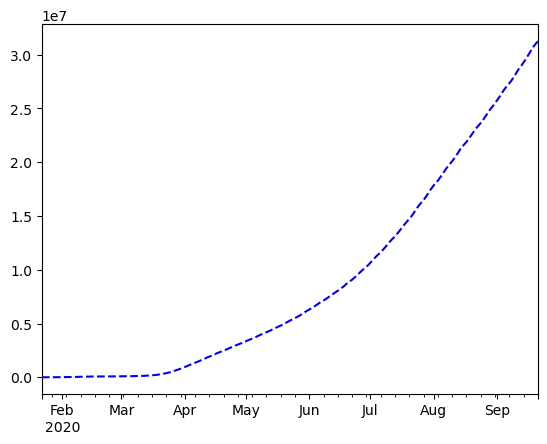

In [ ]:
df_N['confirmed'].plot(style=['b--']) #using pandas to plot the 'confirmed' column from the DataFrame df_N with a blue dashed line style.

- we can see there was rapid increase in covid 19 confirmed cases from april 2020

<Axes: >

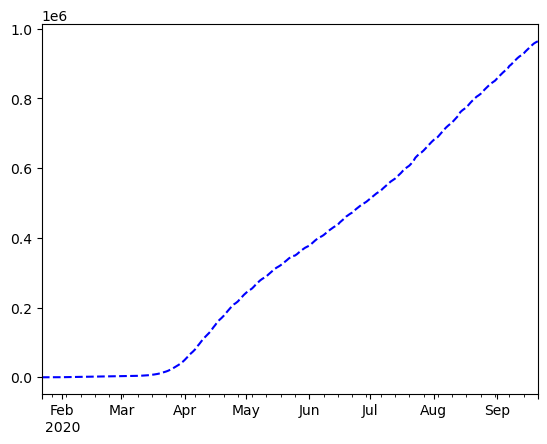

In [ ]:
df_N['death'].plot(style=['b--'])

- we can see deaths increased rapidly after april

<Axes: >

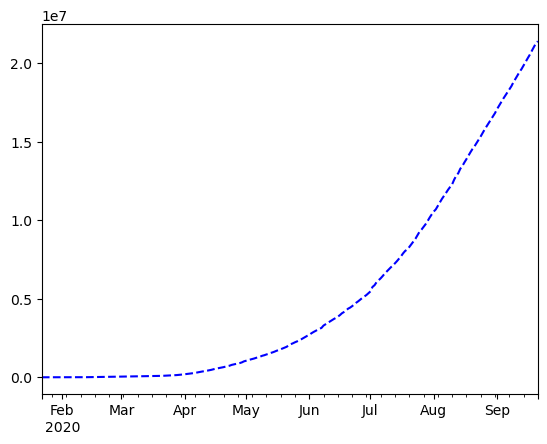

In [ ]:
df_N['recovered'].plot(style=['b--'])

# Dropping unnecessary features

In [ ]:
l = ['Country/Region','Lat','Long','Province/State'] # creating a list l which contains the following columns
country_c = dfc['Country/Region'] # asigning the country/region column to variable country_c
dfc=dfc.drop(columns=l,axis=1) # dropping the columns listed in the list l
country_d = dfd['Country/Region']
dfd=dfd.drop(columns=l,axis=1)
country_r = dfr['Country/Region']
dfr=dfr.drop(columns=l,axis=1)

- Country used in handling months

In [ ]:
dfc.columns = pd.to_datetime(dfc.columns)
dfd.columns = pd.to_datetime(dfd.columns)
dfr.columns = pd.to_datetime(dfr.columns)

C:\Users\SCR91020288\AppData\Local\Temp\ipykernel_18176\3718687058.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfc.columns = pd.to_datetime(dfc.columns)
C:\Users\SCR91020288\AppData\Local\Temp\ipykernel_18176\3718687058.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfd.columns = pd.to_datetime(dfd.columns)
C:\Users\SCR91020288\AppData\Local\Temp\ipykernel_18176\3718687058.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfr.columns = pd.to_datetime(dfr.columns)


In [ ]:
mondfc = dfc.groupby(dfc.columns.strftime("%B %Y"), axis=1).sum() #setting columns of dfc data set to month year format
mondfc = mondfc.set_index(country_c) #setting index column of dfc to country_c columns which contains country/region
mondfd = dfd.groupby(dfd.columns.strftime("%B %Y"), axis=1).sum()
mondfd = mondfd.set_index(country_d)
mondfr = dfr.groupby(dfr.columns.strftime("%B %Y"), axis=1).sum()
mondfr = mondfr.set_index(country_r)


In [ ]:
mondfc

,April 2020,August 2020,February 2020,January 2020,July 2020,June 2020,March 2020,May 2020,September 2020
Country/Region,,,,,,,,,
Afghanistan,27237,1163050,6,0,1077445,750884,1219,225655,811080
Albania,15632,230278,0,0,119660,50880,2232,28873,231759
Algeria,69497,1185076,5,0,674286,337819,4823,211394,1000251
Andorra,19106,31382,0,0,27174,25511,2787,23498,28598
Angola,601,59160,0,0,20049,4660,48,1639,69741
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,8597,519581,0,0,230938,25938,1355,12240,620634
Western Sahara,142,310,0,0,310,279,0,210,210
Yemen,31,57611,0,0,46638,23264,0,4115,42056


In [ ]:
mondfd

,April 2020,August 2020,February 2020,January 2020,July 2020,June 2020,March 2020,May 2020,September 2020
Country/Region,,,,,,,,,
Afghanistan,860,42026,0,0,33392,14907,29,4994,29869
Albania,728,6945,0,0,3302,1221,91,975,6903
Algeria,9197,42428,0,0,32720,23600,324,16901,33561
Andorra,917,1632,0,0,1612,1545,39,1518,1113
Angola,60,2627,0,0,915,210,6,85,2742
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,51,3524,0,0,1465,99,6,71,4387
Western Sahara,0,31,0,0,31,30,0,6,21
Yemen,2,16517,0,0,12932,5932,0,790,12156


In [ ]:
mondfr

,April 2020,August 2020,February 2020,January 2020,July 2020,June 2020,March 2020,May 2020,September 2020
Country/Region,,,,,,,,,
Afghanistan,2927,843438,0,0,688117,184768,26,24129,655226
Albania,7902,120294,0,0,67686,32742,241,21760,133738
Algeria,24072,826991,0,0,467472,233399,594,109804,705223
Andorra,5636,26677,0,0,24877,23239,37,18505,20772
Angola,129,22283,0,0,5708,1668,1,466,26974
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,1707,308105,0,0,56636,12527,208,8724,412428
Western Sahara,40,248,0,0,248,216,0,176,168
Yemen,7,30993,0,0,21374,5661,0,144,25344


In [ ]:
maxdfc = pd.concat([pd.DataFrame(mondfc.idxmax(axis=1)),pd.DataFrame(mondfc.max(axis=1)),],axis= 1)
# idxmax - This creates a DataFrame containing the month and year with the maximum value for each row in mondfc.
# max - contains values that are max  similarly for all dataframes below
maxdfc.columns = ['Maximum month','Number of confirmed people']
maxdfd = pd.concat([pd.DataFrame(mondfd.idxmax(axis=1)),pd.DataFrame(mondfd.max(axis=1))],axis= 1)
maxdfd.columns = ['Maximum month','Number of confirmed people']
maxdfr = pd.concat([pd.DataFrame(mondfr.idxmax(axis=1)),pd.DataFrame(mondfr.max(axis=1))],axis= 1)
maxdfr.columns = ['Maximum month','Number of confirmed people']

In [ ]:
maxdfc

,Maximum month,Number of confirmed people
Country/Region,,
Afghanistan,August 2020,1163050
Albania,September 2020,231759
Algeria,August 2020,1185076
Andorra,August 2020,31382
Angola,September 2020,69741
...,...,...
West Bank and Gaza,September 2020,620634
Western Sahara,August 2020,310
Yemen,August 2020,57611


In [ ]:
maxdfd

,Maximum month,Number of confirmed people
Country/Region,,
Afghanistan,August 2020,42026
Albania,August 2020,6945
Algeria,August 2020,42428
Andorra,August 2020,1632
Angola,September 2020,2742
...,...,...
West Bank and Gaza,September 2020,4387
Western Sahara,August 2020,31
Yemen,August 2020,16517


In [ ]:
maxdfr

,Maximum month,Number of confirmed people
Country/Region,,
Afghanistan,August 2020,843438
Albania,September 2020,133738
Algeria,August 2020,826991
Andorra,August 2020,26677
Angola,September 2020,26974
...,...,...
West Bank and Gaza,September 2020,412428
Western Sahara,August 2020,248
Yemen,August 2020,30993


In [ ]:
maxdfc['Maximum month'].value_counts()

Maximum month
August 2020       201
September 2020     63
May 2020            2
Name: count, dtype: int64

In [ ]:
maxdfd['Maximum month'].value_counts()

Maximum month
August 2020       182
September 2020     50
April 2020         32
May 2020            1
July 2020           1
Name: count, dtype: int64

In [ ]:
maxdfr['Maximum month'].value_counts()

Maximum month
August 2020       176
September 2020     70
April 2020          4
May 2020            1
July 2020           1
June 2020           1
Name: count, dtype: int64

## **visualization**

<Axes: xlabel='Maximum month'>

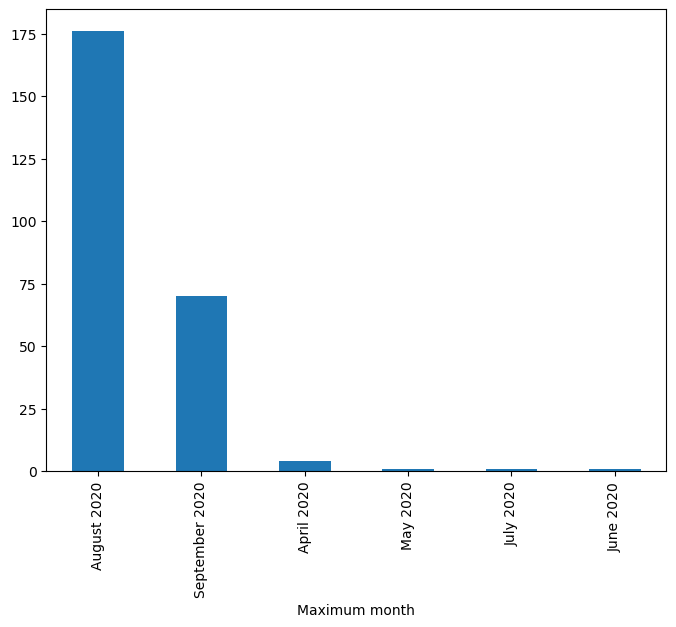

In [ ]:
maxdfr['Maximum month'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

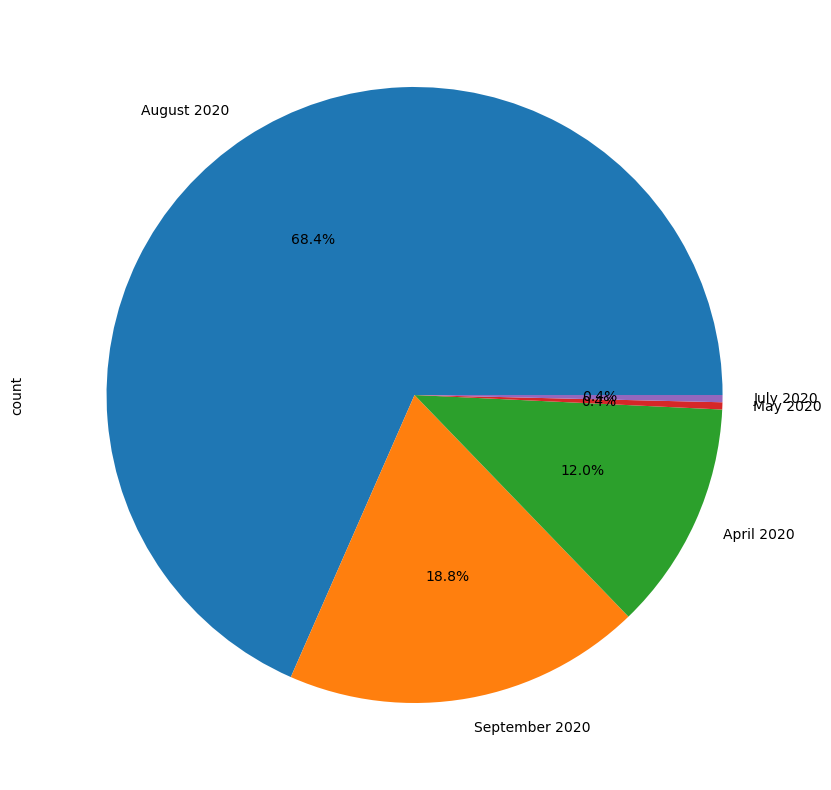

In [ ]:
plt.figure(figsize=(10,10))
maxdfd['Maximum month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Maximum month', ylabel='count'>

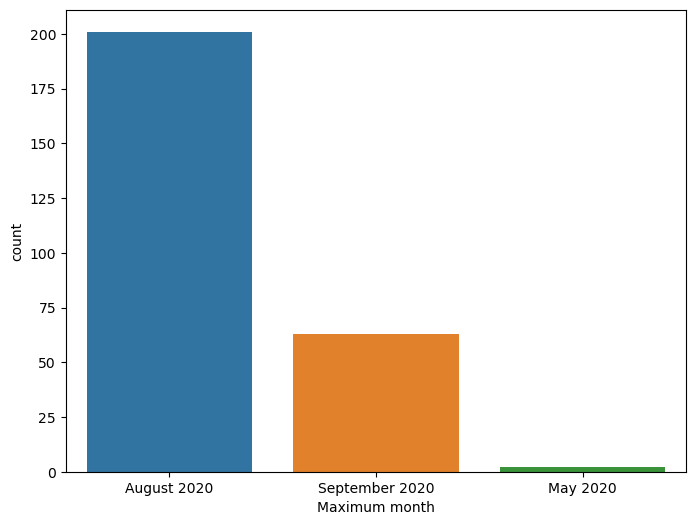

In [ ]:
sns.countplot(data=maxdfc,x='Maximum month')

# **Conclusion**
- august 2020 is the highest scored in the 3 datasets.
- covid start with little numbers in may 2020 and start to increase extremly in august 2020
- august 2020 recorded the highest number of death 182 and recovered 176.

# **Modeling**

In [ ]:
df_N

,confirmed,death,recovered
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-09-17,30175313,946061,20527185
2020-09-18,30499534,951767,20778990
2020-09-19,30780755,956999,21016801
2020-09-20,31021972,960695,21252815


<Axes: >

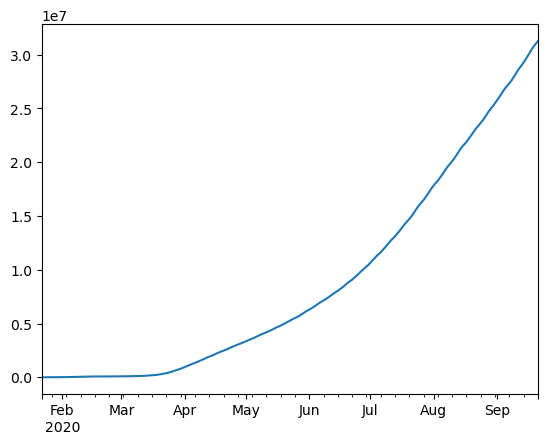

In [ ]:
df_N['confirmed'].plot()

In [ ]:
df_N.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
               '2020-09-20', '2020-09-21'],
              dtype='datetime64[ns]', length=244, freq=None)

In [ ]:
mon_date = (df_N.resample("1w").sum())
mon_date  # changing time frequency from daily to weekly

,confirmed,death,recovered
2020-01-26,5702,159,185
2020-02-02,61656,1351,1415
2020-02-09,213913,4547,11957
2020-02-16,400379,9574,48392
2020-02-23,534704,15428,126403
2020-03-01,582581,19736,236002
2020-03-08,694676,23670,373714
2020-03-15,965654,35505,481128
2020-03-22,1772840,73459,604161
2020-03-29,3832996,178708,861499


<Axes: >

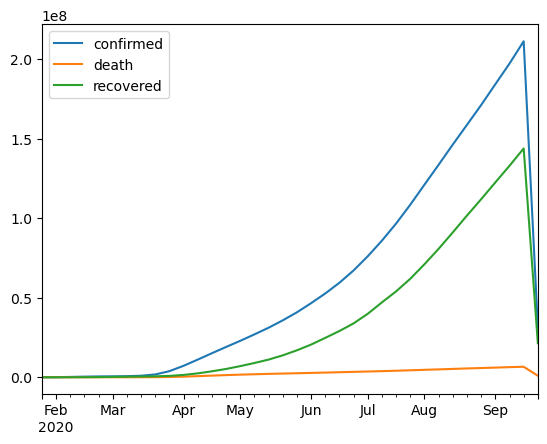

In [ ]:
mon_date.plot()

In [ ]:
mon_date.shape

(36, 3)

In [ ]:
from datetime import datetime
import matplotlib.pylab as plt #for visualization
plt.figure #to solve error of pt has no attribute figure
import seaborn as sns
import plotly.express as px
##%matplotlib inline


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf  # for autocorelation graph and partial autocorelation graph
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from statsmodels.graphics.tsaplots import plot_predict
from sklearn import metrics

In [ ]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=  (10,6))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data , lags = 15 , ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data , lags = 15 , ax=ax2)  # creating a function to create the autocorelation and partial autocorelation graph

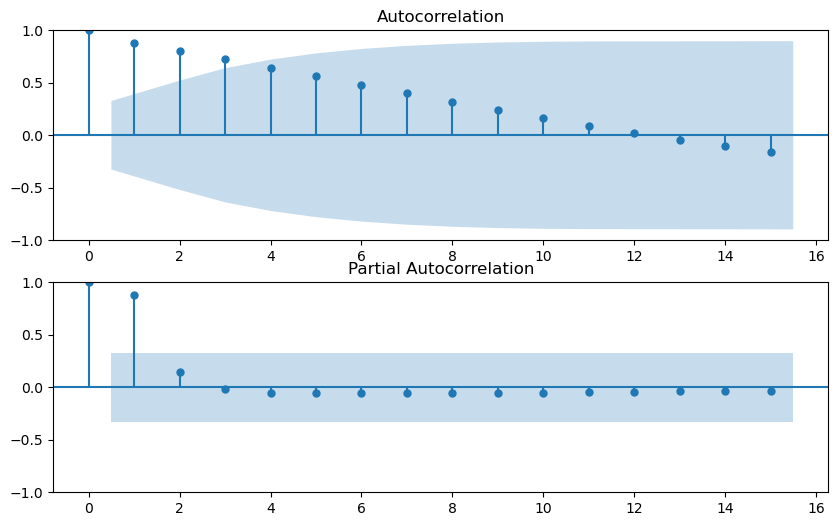

In [ ]:
ACF_and_PACF(mon_date['death'])

- we can see there is a formation of sinosodial wave in autocorelation but not in partial autocorelation so we need to fix it using ARIMA MODEL

# addictive model

In [ ]:
rolmean = mon_date.rolling(window=4).mean()   # CALCULATING ROLLING MEAN FOR OUR mon_date dataset
rolstd = mon_date.rolling(window=4).std()  #CALCULATING ROLLING STANDARD DEVIATION FOR OUR mon_date dataset
print (rolmean , rolstd)

               confirmed       death     recovered
2020-01-26           NaN         NaN           NaN
2020-02-02           NaN         NaN           NaN
2020-02-09           NaN         NaN           NaN
2020-02-16  1.704125e+05     3907.75  1.548725e+04
2020-02-23  3.026630e+05     7725.00  4.704175e+04
2020-03-01  4.328942e+05    12321.25  1.056885e+05
2020-03-08  5.530850e+05    17102.00  1.961278e+05
2020-03-15  6.944038e+05    23584.75  3.043118e+05
2020-03-22  1.003938e+06    38092.50  4.237512e+05
2020-03-29  1.816542e+06    77835.50  5.801255e+05
2020-04-05  3.447736e+06   170429.25  8.556885e+05
2020-04-12  5.983150e+06   339315.00  1.349510e+06
2020-04-19  9.319227e+06   583036.25  2.136834e+06
2020-04-26  1.312385e+07   880708.25  3.227187e+06
2020-05-03  1.704711e+07  1194234.00  4.610517e+06
2020-05-10  2.100971e+07  1491870.25  6.238718e+06
2020-05-17  2.501656e+07  1762743.00  8.080112e+06
2020-05-24  2.920060e+07  2007298.00  1.021975e+07
2020-05-31  3.368197e+07  22295

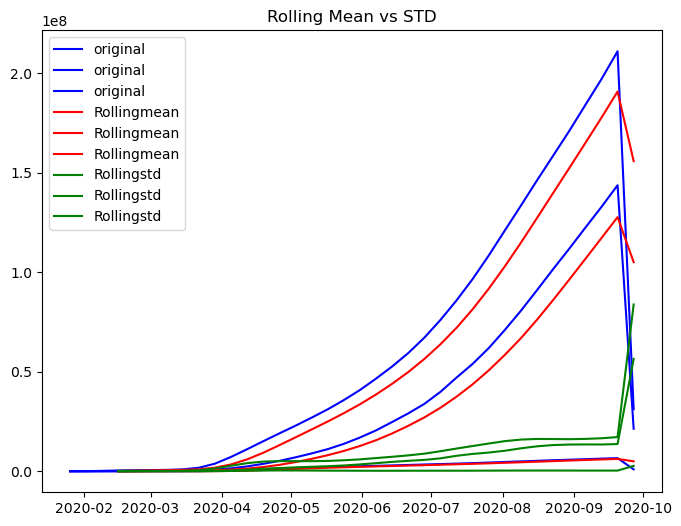

In [ ]:
orig = plt.plot(mon_date , color = "blue" , label = "original")
mean = plt.plot(rolmean , color = "red" , label = "Rollingmean")
std = plt.plot(rolstd , color = "green" , label = "Rollingstd")
plt.legend(loc = 'best')
plt.title("Rolling Mean vs STD")
plt.show()


In [ ]:
dftest = adfuller(mon_date['recovered'] , autolag= "AIC")
# performing the Augmented Dickey-Fuller test on the time series data in the 'recovered' column of the mon_date DataFrame.
# using the adfuller function to perform the Augmented Dickey-Fuller test on the 'recovered' column of the mon_date
#DataFrame. The autolag="AIC" argument is used to automatically select the optimal number of lags.

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
# creating a pandas Series named dfoutput with the test statistic, p-value, number of lags used, and number
#of observations used as values. These values are extracted from the results of the Augmented Dickey-Fuller test.
for key,value in dftest[4].items():
#iterating over the critical values from the test results.
    dfoutput['Critical Value (%s)'%key] = value
    #For each critical value,  adding it to the dfoutput Series with an appropriate label.
print(dfoutput)
#The output will provide information about the stationarity of the 'recovered' time series
#data. If the p-value is small (typically less than 0.05), it suggests that the data is stationary.
#Additionally, you can compare the test statistic with the critical values to make a decision about stationarity.

Test Statistic                 -1.759195
p-value                         0.400900
Lags Used                      10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64
